In [292]:
## k_means
# written by naveen on 9/26/20

def k_means_n(DATA,n_clusters):

    Z = np.random.randint(len(DATA), size=(1,n_clusters))
    MEANS = DATA[Z,:][0]


    DIFF = np.zeros(np.shape(MEANS)) 

    FLAG=0
    ite=0
    while FLAG==0:
        ite = ite+1
        ind = np.zeros(len(DATA))
        for i in range(len(DATA)):
            tempdist = np.zeros(len(MEANS))
            for j in range(len(MEANS)):
                tempdist[j] = np.linalg.norm(DATA[i,:]-MEANS[j,:])
            ind[i] = np.argmin(tempdist)


        NEWMEANS = np.zeros(np.shape(MEANS)) 
        for k in range(n_clusters):
            NEWMEANS[k,:] = np.mean(DATA[np.argwhere(ind==k),:],axis=0)[0]
  
        DIFF = NEWMEANS-MEANS
        MEANS = NEWMEANS

        FLAT = np.array(DIFF).flatten()
        if np.sum(np.abs(FLAT))==0:
            FLAG=1
            
    print('Converged in',ite,'iterations' )
    return(ind)


Converged in 10 iterations


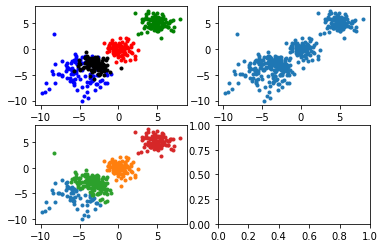

In [302]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# CREATING DATA
A = np.random.randn(100,2)
B = np.random.randn(100,2)+5
C = 2*np.random.randn(100,2)-5
D = 1*np.random.randn(100,2)-3

#ASSIGNING INDECES
MAT = np.concatenate((A,B,C,D),axis=0)
IDX = np.ones((np.shape(MAT)[0],1))
IDX[len(A)+1 : len(B)+len(A)] = 2
IDX[len(A)+len(B)+1 : len(A)+len(B)+len(C)] = 3
IDX[len(A)+len(B)+len(C)+1 : len(A)+len(B)+len(C)+len(D)] = 4

# VISUALIZING DATA
fig, ax = plt.subplots(2,2)
ax[0,0].plot(A[:,0],A[:,1],'.r')
ax[0,0].plot(B[:,0],B[:,1],'.g')
ax[0,0].plot(C[:,0],C[:,1],'.b')
ax[0,0].plot(D[:,0],D[:,1],'.k')

ax[0,1].plot(MAT[:,0],MAT[:,1],'.')


# PERFORMING KMEANS
n_clusters = 4
idx = k_means_n(MAT,n_clusters)

for x in range(n_clusters):
    ax[1,0].plot(MAT[np.argwhere(idx==x),0],MAT[np.argwhere(idx==x),1],'.')